## 1. Data Preparation and Exploration

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("exchange_rate.csv") 
dataset.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
indexedDataset = pd.to_datetime(dataset['date'],errors='coerce')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [6]:
dataset.index

RangeIndex(start=0, stop=7588, step=1)

In [7]:
dataset.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [8]:
dataset.shape

(7588, 2)

In [9]:
print(dataset.describe())

           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


# 2. Visualizations

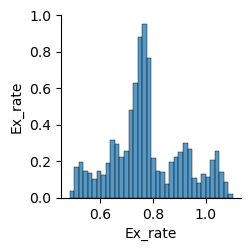

In [10]:
sns.pairplot(data=dataset)
plt.show()

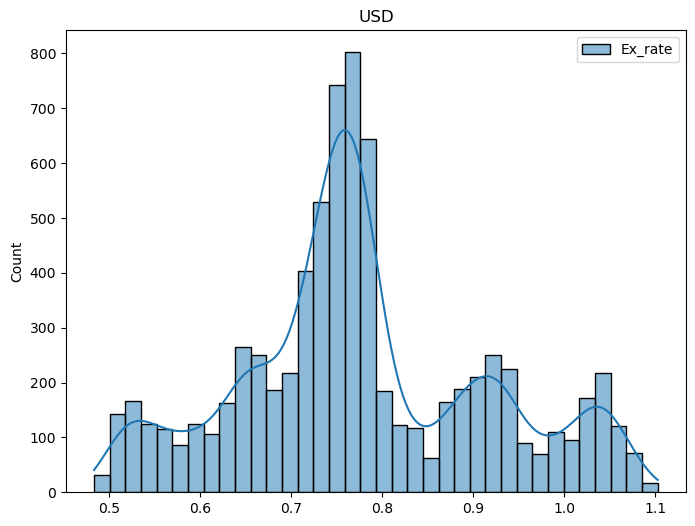

In [11]:
# Example: Histogram of 
plt.figure(figsize=(8, 6))
sns.histplot(dataset, kde=True)
plt.title('USD')
plt.show()

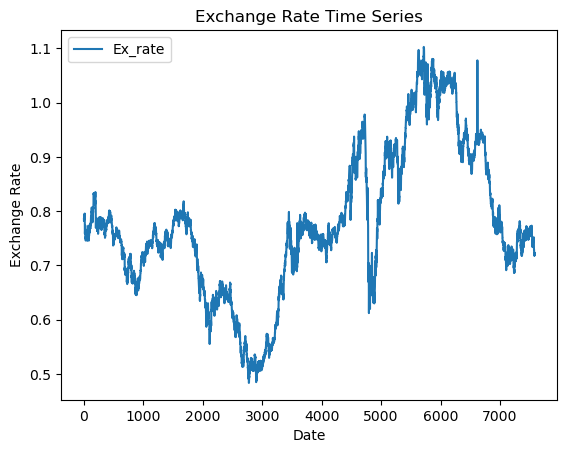

In [12]:
import matplotlib.pyplot as plt

# Plot the time series
dataset.plot()
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

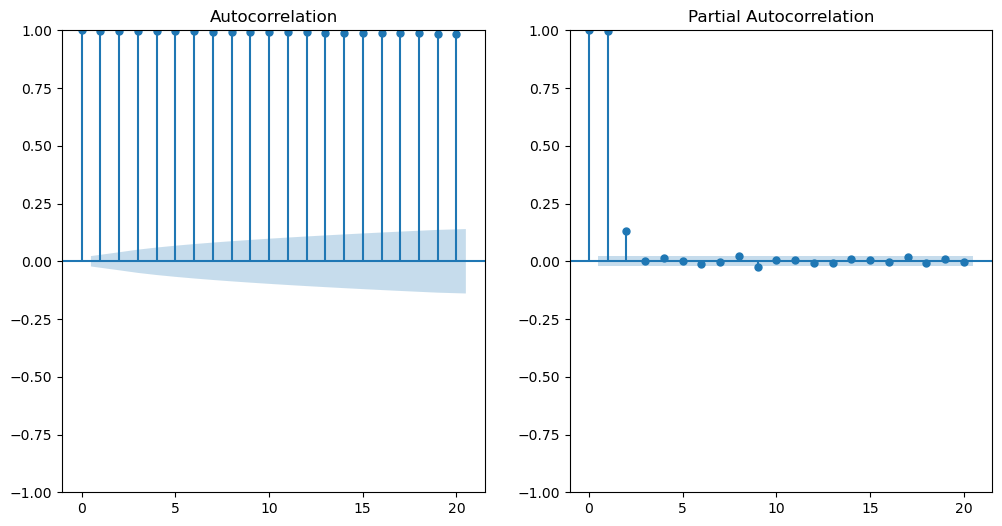

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(dataset['Ex_rate'], lags=20, ax=plt.subplot(121))
plot_pacf(dataset['Ex_rate'], lags=20, ax=plt.subplot(122))
plt.show()


# Part 2: Model Building - ARIMA

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [18]:
# Define p, d, and q
p = 1
d = 1
q = 1
model = ARIMA(dataset['Ex_rate'], order=(p, d, q))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 05 Nov 2024   AIC                         -56102.322
Time:                        02:05:28   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

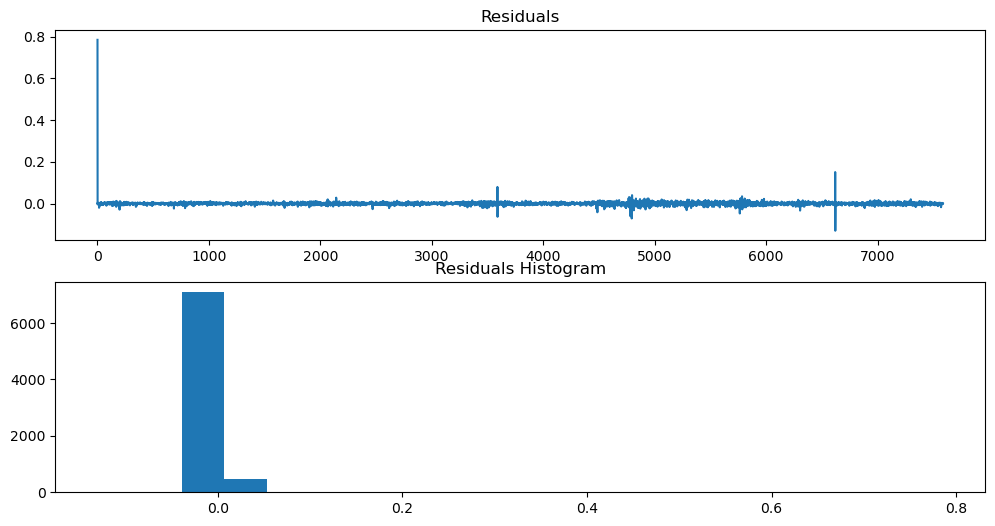

In [19]:
# Residual diagnostics
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.show()

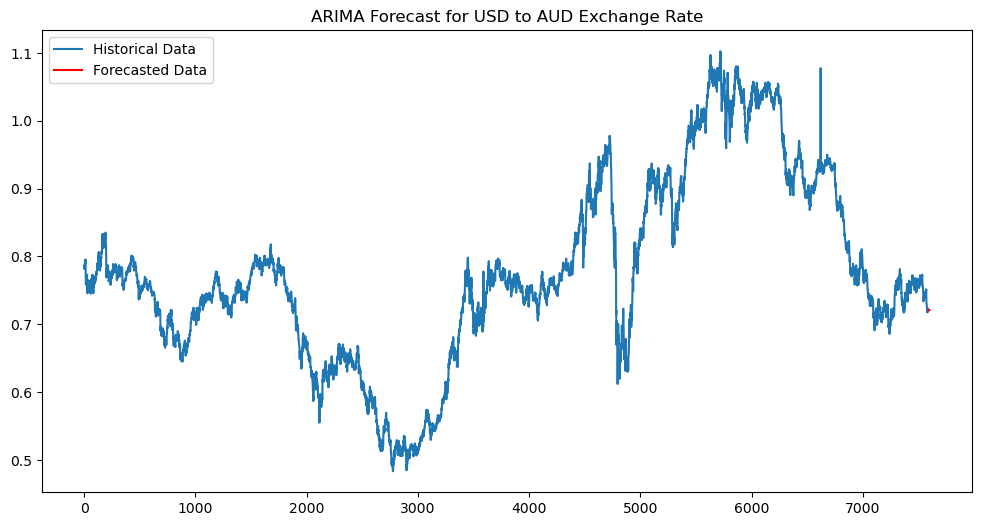

In [21]:
# Forecasting
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(12, 6))
plt.plot(dataset['Ex_rate'], label='Historical Data')
plt.plot(forecast, label='Forecasted Data', color='red')
plt.title('ARIMA Forecast for USD to AUD Exchange Rate')
plt.legend()
plt.show()

# Part 3: Model Building - Exponential Smoothing

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_exp = ExponentialSmoothing(dataset['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)  # Adjust as needed

In [26]:
# Fitting the model
model_fit_exp = model_exp.fit()
print(model_fit_exp.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.575
Trend:                         Additive   BIC                         -77513.626
Seasonal:                      Additive   AICC                        -77624.485
Seasonal Periods:                    12   Date:                 Tue, 05 Nov 2024
Box-Cox:                          False   Time:                         02:09:24
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702083                alpha                 True
smoothing_trend          

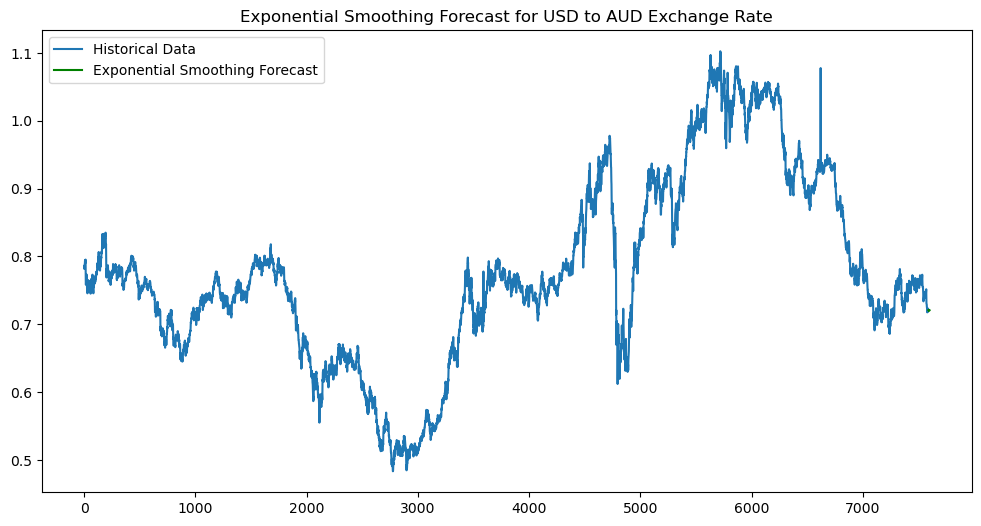

In [28]:
# Forecasting
exp_forecast = model_fit_exp.forecast(steps=12)
plt.figure(figsize=(12, 6))
plt.plot(dataset['Ex_rate'], label='Historical Data')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast for USD to AUD Exchange Rate')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison

## 1=> Compute Error Metrics: 

In [33]:
actual_values = dataset['Ex_rate'][-12:]

In [34]:
# Compute error metrics for ARIMA
mae_arima = mean_absolute_error(actual_values, forecast)
rmse_arima = mean_squared_error(actual_values, forecast, squared=False)
mape_arima = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

In [35]:
# Compute error metrics for Exponential Smoothing
mae_exp = mean_absolute_error(actual_values, exp_forecast)
rmse_exp = mean_squared_error(actual_values, exp_forecast, squared=False)
mape_exp = np.mean(np.abs((actual_values - exp_forecast) / actual_values)) * 100

In [38]:
# Print the error metrics
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%')

ARIMA - MAE: 0.0016644924340379526, RMSE: 0.002000358073451703, MAPE: nan%


In [39]:
print(f'Exponential Smoothing - MAE: {mae_exp}, RMSE: {rmse_exp}, MAPE: {mape_exp}%')

Exponential Smoothing - MAE: 0.0015803004721525553, RMSE: 0.001863851074150817, MAPE: nan%


## 2=> Model Comparison: 

## 3 :Conclusion: